## 0. PRELIMINARIES

In [4]:
import math
import qiskit
import matplotlib as plt
from matplotlib import *
from qiskit import *
from qiskit.visualization import plot_histogram
import numpy as np
from scipy.stats import unitary_group

In [5]:
def simulate(qc):
    aer_sim = Aer.get_backend('aer_simulator')
    transpiled_qc = transpile(qc, aer_sim)
    qobj = assemble(transpiled_qc)
    results = aer_sim.run(qobj).result()
    counts = results.get_counts()
    return counts

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.



## 1. CLASSICAL HASHING

In [6]:
message=input().strip()

f


In [7]:
def LFSR_Classical(x):
    bit = ((x >> 0) ^ (x >> 2) ^ (x >> 3) ^ (x >> 4)) & 1
    x = ((x >> 1)|(bit<<7))%256;
    return x

In [8]:
def LFSRinv_Classical(x):
    bit = ((x >> 1) ^ (x >> 2) ^ (x >> 3) ^ (x >> 7)) & 1
    x = ((x << 1)|bit)%256;
    return x

In [9]:
LFSR_Classical(210)

233

233

In [10]:
LFSRinv_Classical(233)

210

210

In [11]:
def hash_Classical(message):
    x=0
    for i in message:
        x=x^ord(i)
        x=LFSR_Classical(x)
    return x

## 2. QUANTUM HASHING

In [12]:
def LFSR_Quantum():    
    qc = QuantumCircuit(8)
    for qubit in range(7,0,-1):
        qc.swap(qubit-1,qubit)
    qc.cx(6,0)
    qc.cx(5,0)
    qc.cx(4,0)
    lfsr=qc.to_gate()
    lfsr.name = r"$LFSR$"
    return qc,lfsr

In [13]:
def LFSRinv_Quantum():    
    qc = QuantumCircuit(8)
    for qubit in range(1,8):
        qc.swap(qubit-1,qubit)
    qc.cx(3,7)
    qc.cx(4,7)
    qc.cx(5,7)
    lfsr=qc.to_gate()
    lfsr.name = r"$LFSR^{-1}$"
    return qc,lfsr

In [14]:
def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    for qubit in range(nqubits):
        qc.h(qubit)
    for qubit in range(nqubits):
        qc.x(qubit)
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)
    qc.h(nqubits-1)
    for qubit in range(nqubits):
        qc.x(qubit)
    for qubit in range(nqubits):
        qc.h(qubit)
    U_s = qc.to_gate()
    U_s.name = r"$U_s$"
    return U_s

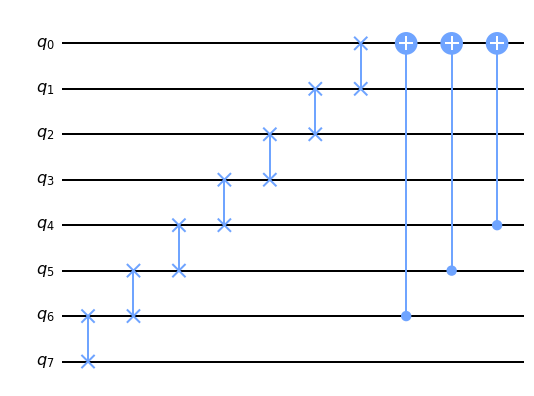

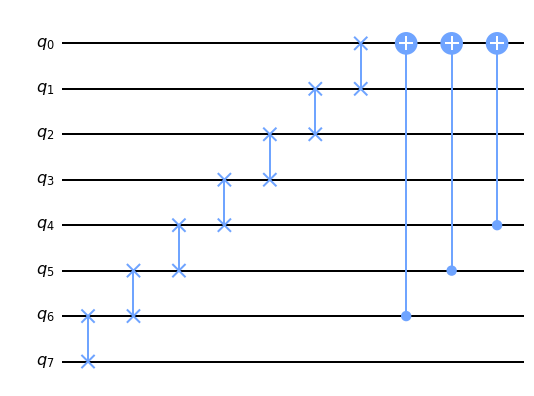

In [15]:
LFSR_Quantum()[0].draw('mpl')

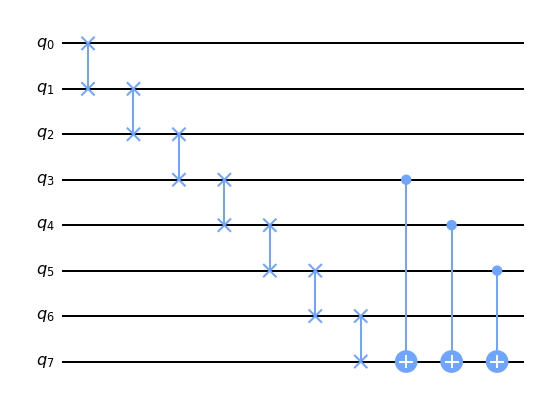

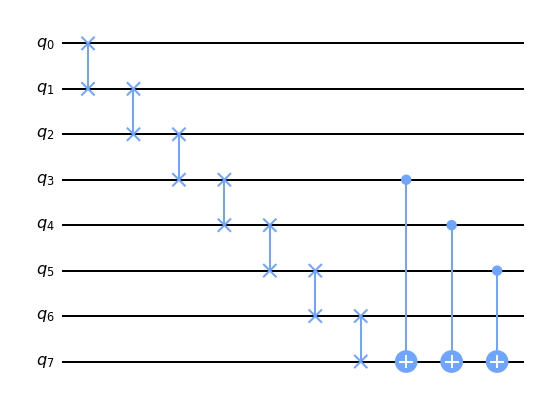

In [16]:
LFSRinv_Quantum()[0].draw('mpl')

In [17]:
def oracle(qc, nonce, register):
    for i in range(8):
        qc.cx(nonce[i],register[i])
    qc.append(LFSR_Quantum()[1], register)
    qc.mct(register[0:3], output)
    qc.append(LFSRinv_Quantum()[1], register)
    for i in range(8):
        qc.cx(nonce[i],register[i])

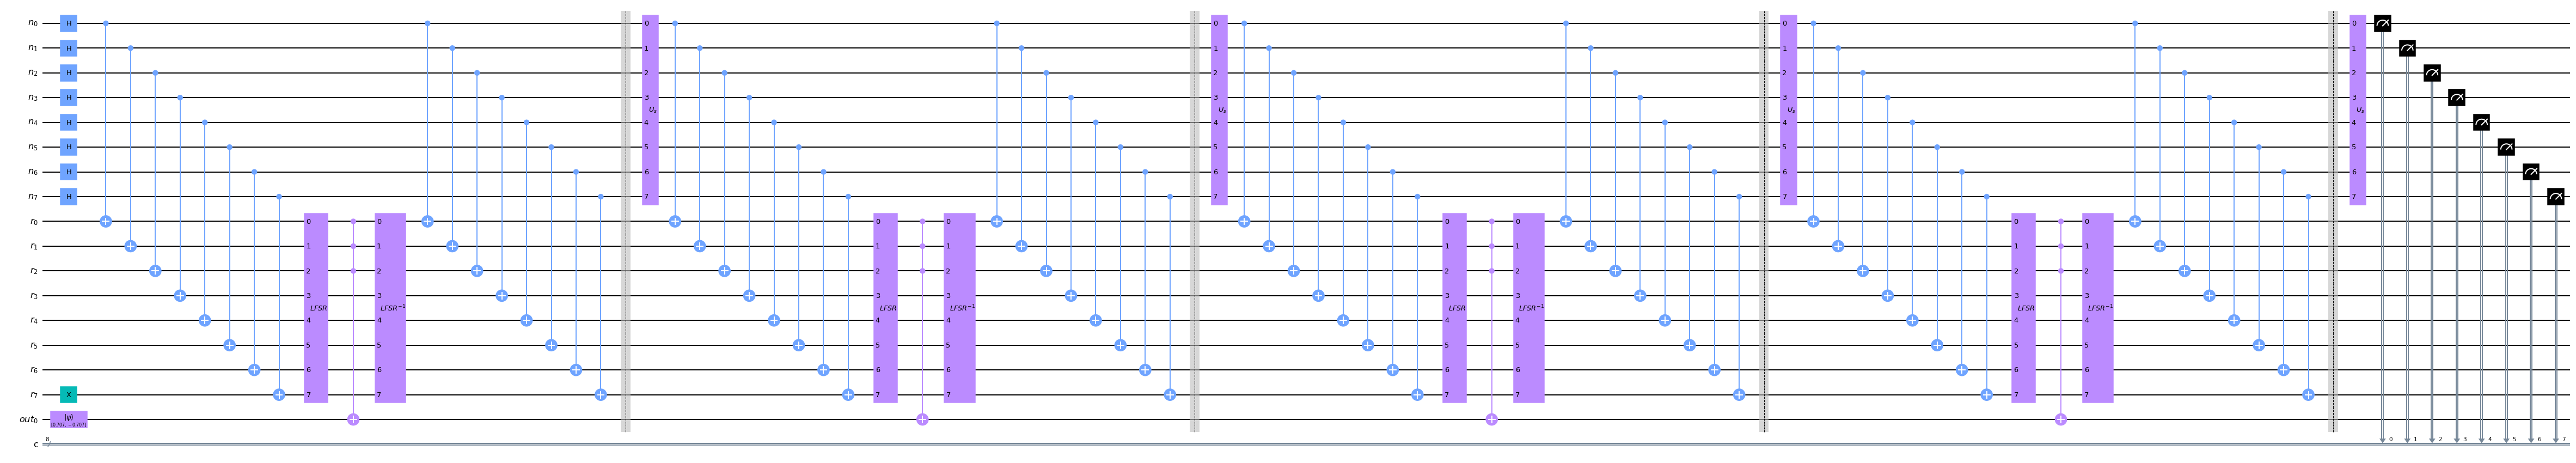

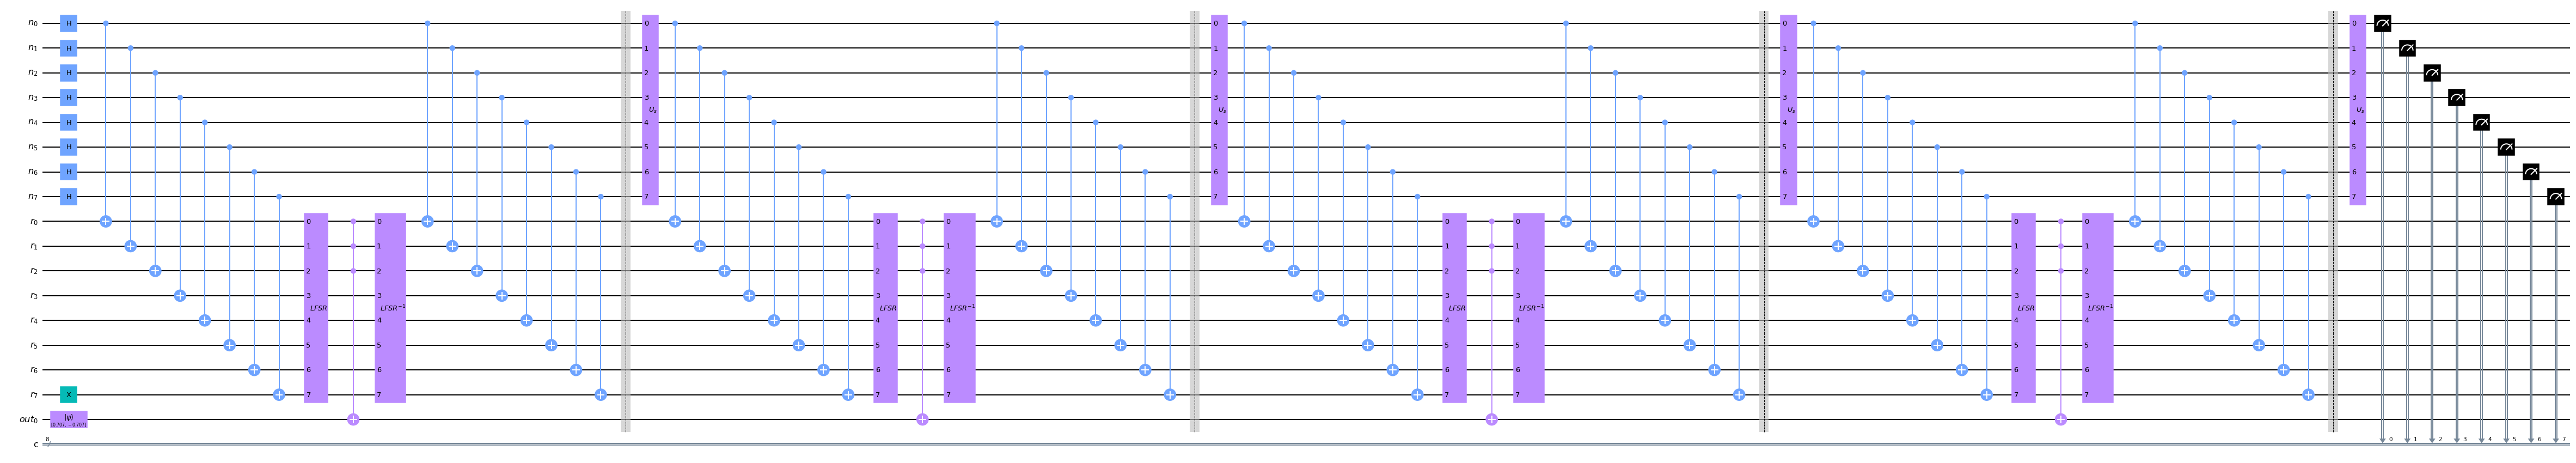

In [18]:
nonce = QuantumRegister(8, name='n')
register = QuantumRegister(8, name='r')
output = QuantumRegister(1, name='out')
cbits=ClassicalRegister(8, name='c')
qc = QuantumCircuit(nonce,register,output,cbits)

qc.initialize([1, -1]/np.sqrt(2), output)
i=7
classical_hash=1
while(classical_hash!=0):
    if classical_hash&1: 
        qc.x(register[i])
    i-=1
    classical_hash=classical_hash>>1
qc.h(nonce)

for _ in range(4):
    oracle(qc, nonce, register)
    qc.barrier()
    qc.append(diffuser(8), [0,1,2,3,4,5,6,7])


qc.measure(nonce,cbits)
qc.draw('mpl',fold=-1)

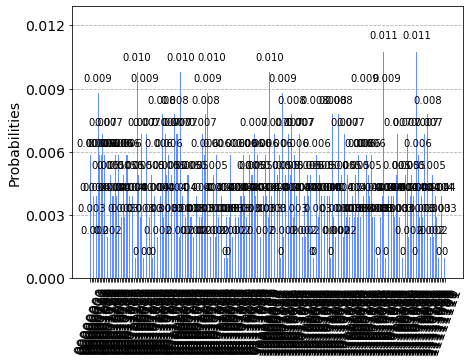

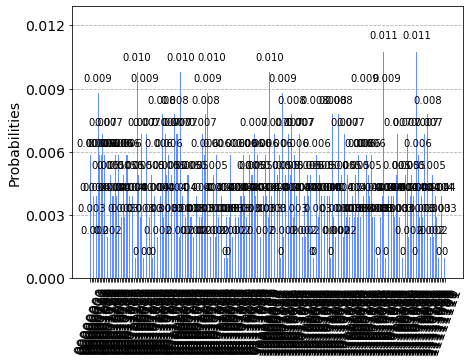

In [19]:
l=simulate(qc)

In [21]:
plot_histogram(l)

NameError: name 'l' is not defined

NameError: name 'l' is not defined

In [ ]:
l